In [69]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd



In [32]:
# Load a picture to check the shape and indicate the path to the data folder
img = mpimg.imread(r"C:\Users\Dell\Downloads\archive (1)\data\SeaLake_1.jpg")
image_dir = "C:/Users/Dell/Downloads/archive (1)/data"
CATEGORIES = ['cloudy', 'desert', 'green_area', 'water']

img.shape 

(64, 64, 3)

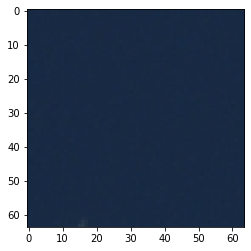

In [33]:
plt.imshow(img)

In [34]:
img_shape = img.shape
IMG_SIZE = img.shape[0]
CHANNELS = img_shape[2]
BATCH_SIZE = 64

print(IMG_SIZE )
print(CHANNELS )

64
3


In [44]:
# Split data into train and test 

train_data = tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                 image_size = (64,64),
                                                                 #labels = 'inferred',
                                                                 label_mode = 'int',
                                                                 batch_size= 32,
                                                                 shuffle = True,
                                                                 validation_split = 0.3,
                                                                 seed = 27,
                                                                 subset = "training"
                                                                 )


test_data = tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                image_size = (64,64),
                                                                #label_mode = "categorical",
                                                                #labels = 'inferred',
                                                                label_mode = 'int',
                                                                batch_size = 32,
                                                                shuffle = True,
                                                                seed = 27,
                                                                validation_split = 0.3,
                                                                subset = 'training'
                                                                )





print('Classes : ',train_data.class_names)


Found 5631 files belonging to 4 classes.
Using 3942 files for training.
Found 5631 files belonging to 4 classes.
Using 3942 files for training.
Classes :  ['cloudy', 'desert', 'green_area', 'water']


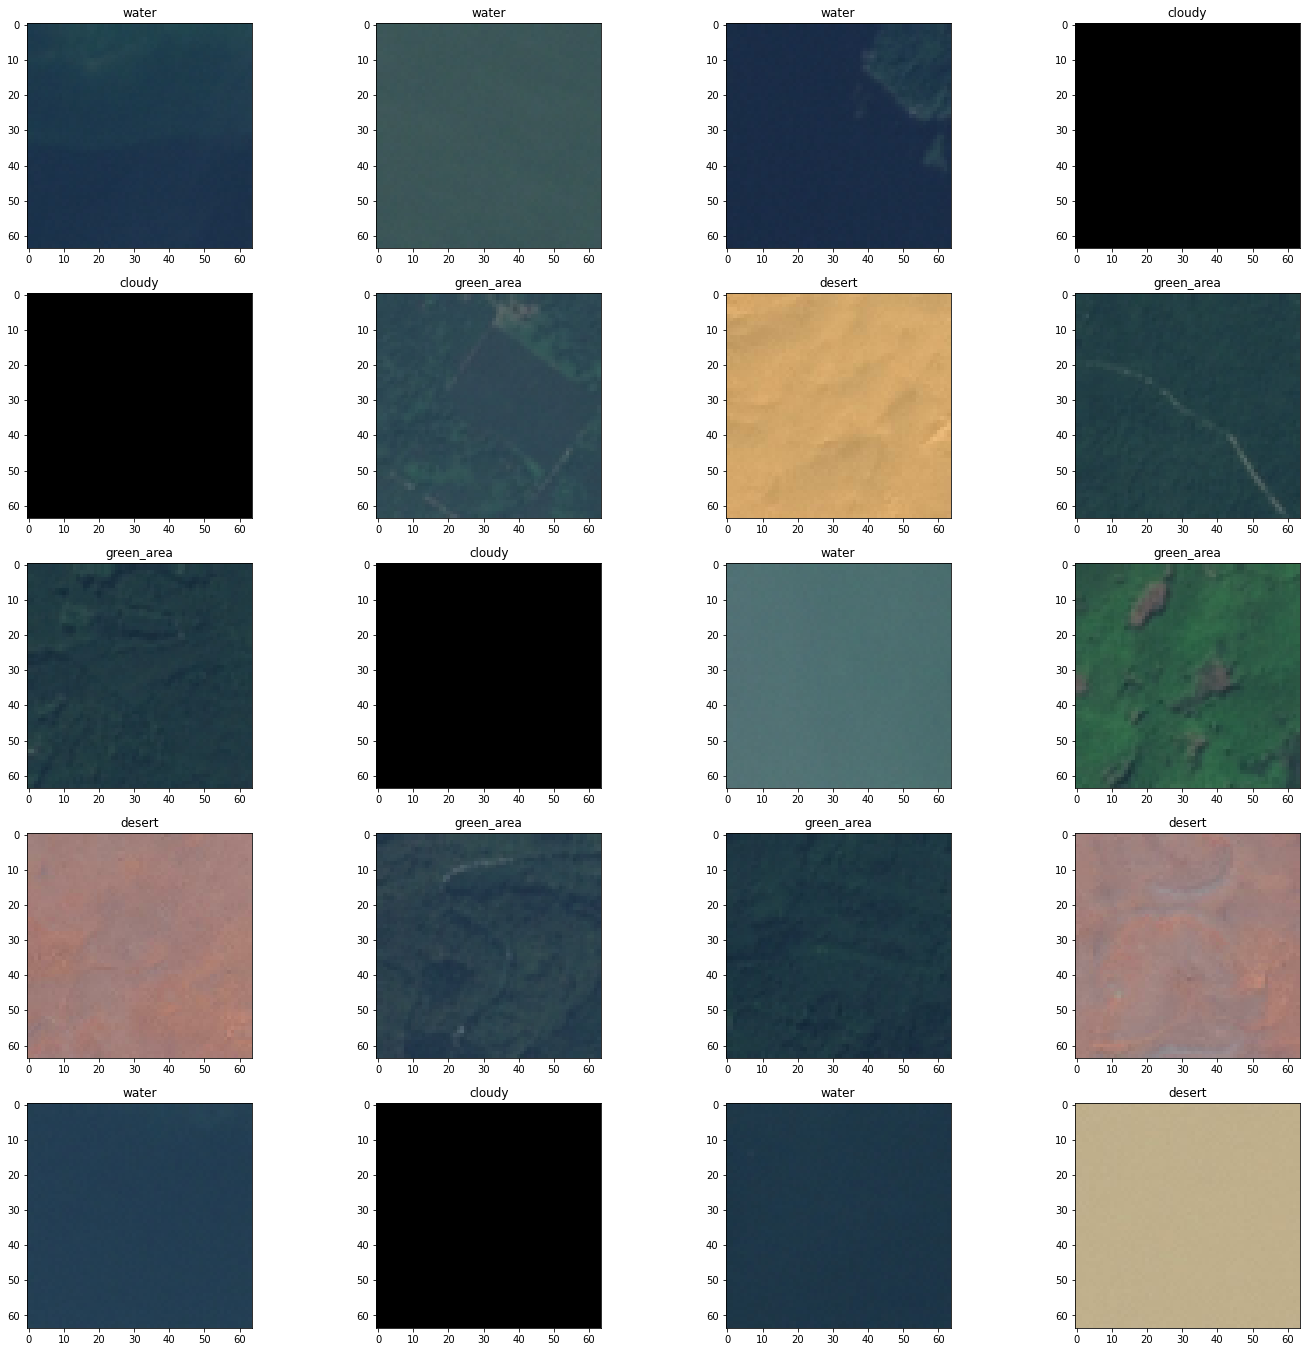

In [47]:
#Displaying the train data sample 

plt.figure(figsize=(24,24))

for image, label in train_data.take(1):
  
  for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(train_data.class_names[(label[i])]) 
    
  

In [88]:
rescale = tf.keras.Sequential([layers.Rescaling(1./255)])
augment = tf.keras.Sequential([
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomFlip(mode='vertical'),
    preprocessing.RandomRotation(factor=0.3),
])

In [89]:
#model inclusion and variables notation 

input_shape = img_shape
n_classes =4
model = Sequential([rescale,
augment])


In [92]:
# leyers of Neural network 
model = Sequential([rescale,
augment, 
layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
layers.MaxPool2D((2,2)),
layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128),
layers.Dense(n_classes, "softmax")])

In [90]:
# leyers of Neural network 
model = Sequential([rescale,
augment, 
layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape)
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,  kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,  kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(n_classes, "softmax"))

In [93]:
#Compilation of the NN model 

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [75]:
#Learning a neural network

early_stopping = EarlyStopping(monitor="val_accuracy", patience=10)

history = model.fit(train_data , validation_data= test_data,
          epochs=50,
          callbacks=[early_stopping]
          )



Epoch 1/50
124/124 [==============================] - 13s 100ms/step - loss: 0.4065 - accuracy: 0.7347 - val_loss: 0.3739 - val_accuracy: 0.7542
Epoch 2/50
124/124 [==============================] - 13s 102ms/step - loss: 0.4136 - accuracy: 0.7511 - val_loss: 0.3880 - val_accuracy: 0.8206
Epoch 3/50
124/124 [==============================] - 13s 102ms/step - loss: 0.4000 - accuracy: 0.7699 - val_loss: 0.3778 - val_accuracy: 0.7435
Epoch 4/50
124/124 [==============================] - 15s 121ms/step - loss: 0.3788 - accuracy: 0.7894 - val_loss: 0.3797 - val_accuracy: 0.8549
Epoch 5/50
124/124 [==============================] - 15s 117ms/step - loss: 0.3671 - accuracy: 0.8189 - val_loss: 0.3788 - val_accuracy: 0.8531
Epoch 6/50
124/124 [==============================] - 14s 113ms/step - loss: 0.3614 - accuracy: 0.8288 - val_loss: 0.3687 - val_accuracy: 0.7763
Epoch 7/50
124/124 [==============================] - 14s 113ms/step - loss: 0.3469 - accuracy: 0.8341 - val_loss: 0.3241 - val_ac

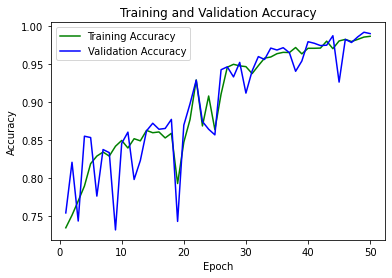

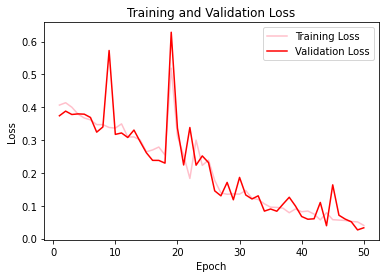

In [76]:
#Result  plot 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()


#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

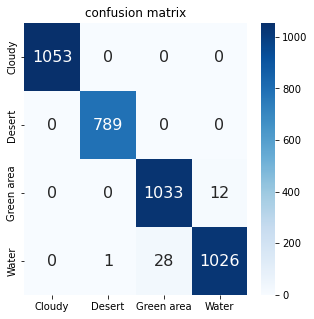

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1053
         1.0       1.00      1.00      1.00       789
         2.0       0.97      0.99      0.98      1045
         3.0       0.99      0.97      0.98      1055

    accuracy                           0.99      3942
   macro avg       0.99      0.99      0.99      3942
weighted avg       0.99      0.99      0.99      3942



In [77]:
true = np.array([])
pred = np.array([])

i = 0
for data, labels in test_data :
    i += 1
    y = np.argmax(model.predict(data), axis=1)
    true = np.append(true, labels)
    pred = np.append(pred, y)
  
    if i == test_data.cardinality().numpy() + 1:
        break

cf_matrix = confusion_matrix(true,pred)
df_cf_matrix = pd.DataFrame(cf_matrix, index = [i for i in range(4)],
                  columns = [i for i in range(4)])

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df_cf_matrix, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='d')
ax.set_xticklabels(('Cloudy','Desert','Green area','Water'))
ax.set_yticklabels(('Cloudy','Desert','Green area','Water'))


plt.title('confusion matrix')

plt.show()

print(classification_report(true,pred)) # 0 = Cloudy, 1 = desert, 2 = green_area, 3 = water

In [486]:
#random forest clasiifaier 

In [78]:

model.evaluate(test_data)


124/124 [==============================] - 3s 27ms/step - loss: 0.0327 - accuracy: 0.9896


[0.03274652361869812, 0.9895991683006287]

In [169]:
model.save(r"C:\Users\Dell\Downloads\archive (1)")


INFO:tensorflow:Assets written to: C:\Users\Dell\Downloads\archive (1)\data\assets
